In [59]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from math import ceil
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import torch.nn as nn
import torch.nn.functional as F


In [60]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [61]:
print("train shape info {}".format(train.shape))
print("test shape info {}".format(test.shape))

train shape info (42000, 785)
test shape info (28000, 784)


In [62]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

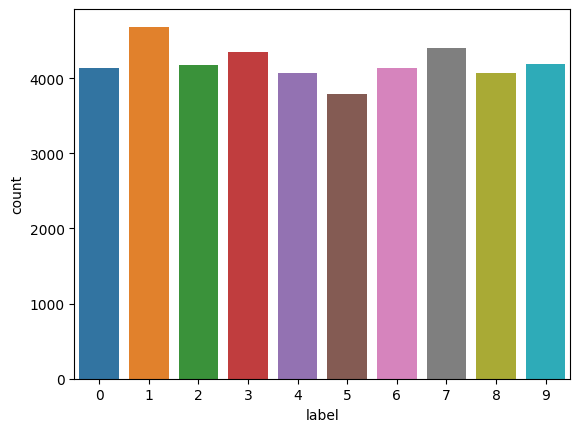

In [64]:
sns.countplot(data=train,x='label')
plt.show()

**plot de quelques images**

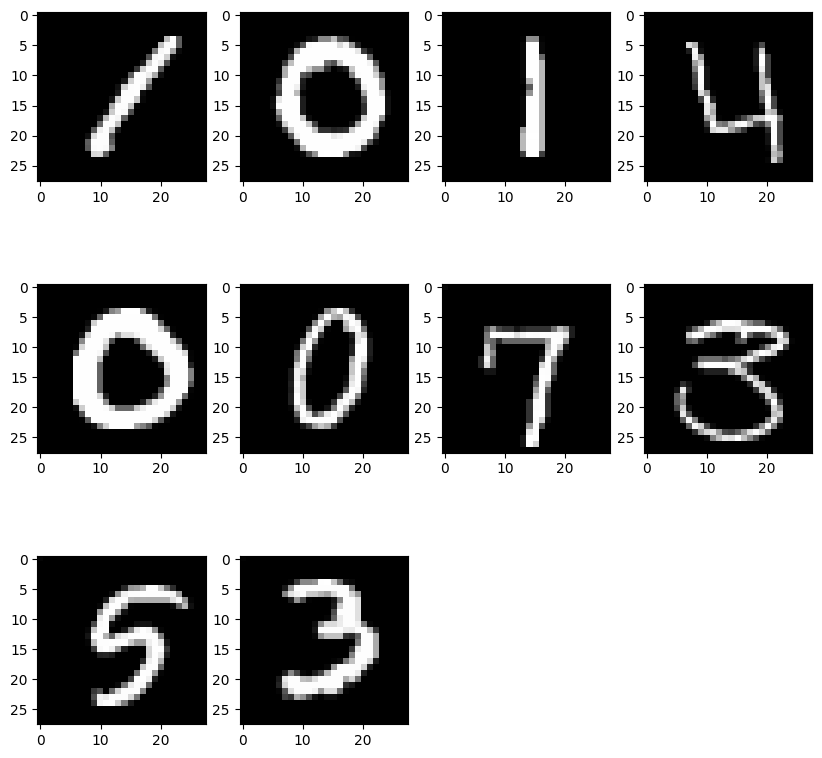

In [65]:
fig=plt.figure(figsize=(10,10))
for i in range(0,10):
    first_image=list(train.iloc[i,:])
    result= np.array([[0 for x in range(28)] for y in range(28)])

    for x in range(0,784):
        result[x//28][x%28]=first_image[x]
    
    plt.subplot(3, 4, i+1)
    plt.imshow(result,cmap='gray')
    
plt.show()
  

**parsing**


In [66]:
X_train=[]
X_test=[]
for i in range(42000):
    temp_image=list(train.iloc[i,1:])
    result= np.array([[0 for x in range(28)] for y in range(28)])

    for x in range(0,784):
        result[x//28][x%28]=temp_image[x]
    X_train.append(result)
        
    
X_train=np.array(X_train)

for i in range(28000):
    temp_image=list(test.iloc[i,:])
    result= np.array([[0 for x in range(28)] for y in range(28)])

    for x in range(0,784):
        result[x//28][x%28]=temp_image[x]
    X_test.append(result)
    
X_test=np.array(X_test)

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train = X_train/ 255.0
X_test = X_test / 255.0

In [ ]:
y_train=to_categorical(train['label'])
X_train=X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test=X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.2034 - accuracy: 0.9396
Epoch 2/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0667 - accuracy: 0.9795
Epoch 3/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0412 - accuracy: 0.9869
Epoch 4/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0268 - accuracy: 0.9921
Epoch 5/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 6/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0136 - accuracy: 0.9961
Epoch 7/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0086 - accuracy: 0.9980
Epoch 8/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0058 - accuracy: 0.9988
Epoch 9/10
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0049 - accuracy: 0.9992
Epoch 10/10
1313/1313 [==============================] - 13s 10ms

In [ ]:
y_pred=model.predict(X_test)

875/875 [==============================] - 2s 3ms/step


In [ ]:
y_pred

array([[4.33448555e-10, 4.62582057e-16, 1.00000000e+00, ...,
        5.67886960e-10, 8.30377989e-11, 5.32145820e-11],
       [9.99999523e-01, 5.35895330e-13, 2.69785527e-09, ...,
        1.36773926e-08, 3.23068100e-11, 7.01666558e-10],
       [1.32402089e-10, 8.29619307e-09, 4.87379339e-07, ...,
        1.70142866e-05, 1.18275227e-06, 9.99973774e-01],
       ...,
       [1.73367718e-20, 3.54553762e-15, 2.45326980e-17, ...,
        2.74242322e-16, 3.26773873e-13, 1.29875746e-11],
       [1.02534465e-11, 3.69736663e-12, 1.27593778e-11, ...,
        7.18953075e-08, 5.07012299e-09, 9.99849677e-01],
       [1.83552826e-11, 6.43796550e-16, 1.00000000e+00, ...,
        6.12124370e-12, 1.19084465e-09, 1.10748322e-09]], dtype=float32)